# K-Means Clustering: Unsupervised Learning

In [1]:
# Импорт библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris

# Настройка визуализации
plt.style.use('default')
sns.set_palette("husl")
%matplotlib inline

## Часть 1: Простой пример с Iris Dataset

Начнем с классического датасета Iris, чтобы понять как работает K-Means.

**Задача:** Разделить цветы ириса на группы по их характеристикам (без использования меток видов)

In [2]:
# Загрузка Iris dataset
iris = load_iris()
X_iris = iris.data[:, :2]  # Используем только первые 2 признака для визуализации
feature_names = iris.feature_names[:2]

# Создаем DataFrame
df_iris = pd.DataFrame(X_iris, columns=feature_names)
df_iris.head()

,sepal length (cm),sepal width (cm)
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6


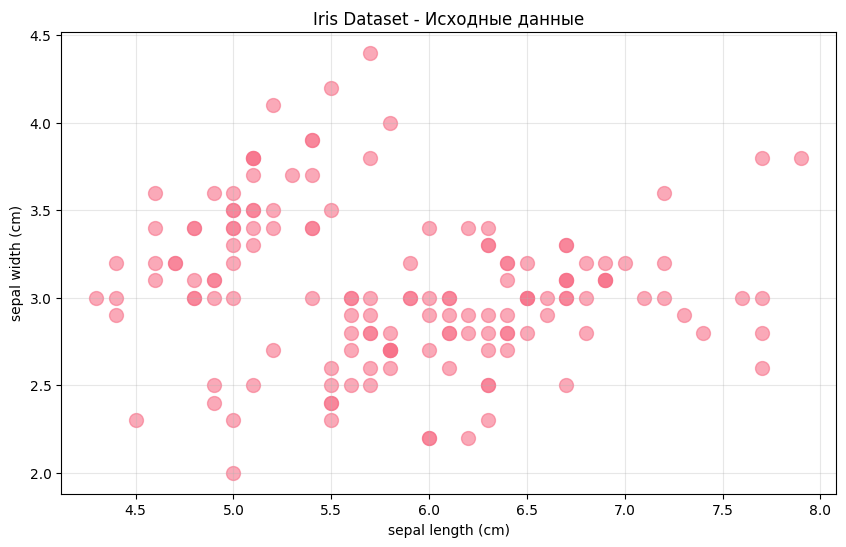

In [3]:
# Визуализация данных (до кластеризации)
plt.figure(figsize=(10, 6))
plt.scatter(df_iris.iloc[:, 0], df_iris.iloc[:, 1], s=100, alpha=0.6)
plt.xlabel(feature_names[0])
plt.ylabel(feature_names[1])
plt.title('Iris Dataset - Исходные данные')
plt.grid(True, alpha=0.3)
plt.show()

### Применяем K-Means с K=3

Мы знаем, что у Iris 3 вида цветов, поэтому выберем K=3.

In [4]:
# Создаем и обучаем модель K-Means
kmeans_iris = KMeans(n_clusters=3, random_state=42, n_init=10)
clusters_iris = kmeans_iris.fit_predict(X_iris)

# Добавляем метки кластеров в DataFrame
df_iris['Cluster'] = clusters_iris

print("Распределение точек по кластерам:")
print(df_iris['Cluster'].value_counts().sort_index())

Распределение точек по кластерам:
Cluster
0    47
1    53
2    50
Name: count, dtype: int64


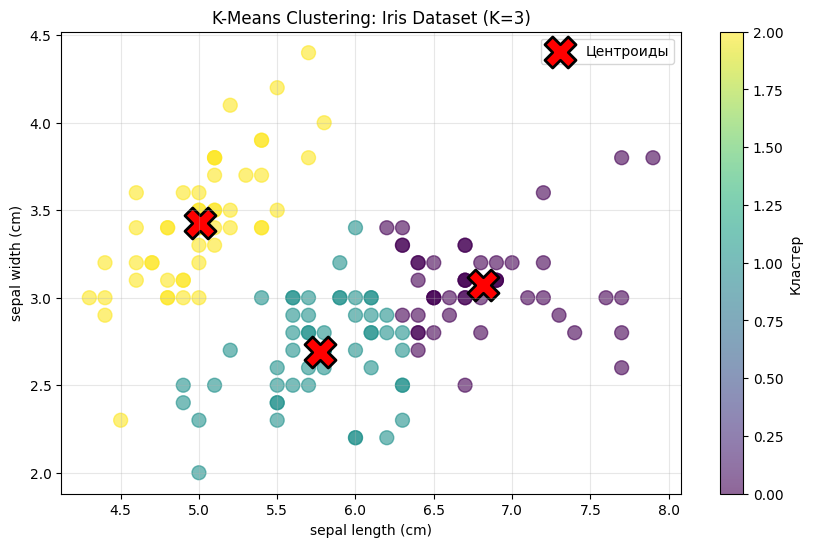


Inertia (WCSS): 37.05


In [5]:
# Визуализация результатов кластеризации
plt.figure(figsize=(10, 6))

# Рисуем точки, окрашенные по кластерам
scatter = plt.scatter(df_iris.iloc[:, 0], df_iris.iloc[:, 1], 
                     c=clusters_iris, cmap='viridis', s=100, alpha=0.6)

# Рисуем центроиды
centroids = kmeans_iris.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], 
           s=500, c='red', marker='X', 
           edgecolors='black', linewidths=2,
           label='Центроиды')

plt.xlabel(feature_names[0])
plt.ylabel(feature_names[1])
plt.title('K-Means Clustering: Iris Dataset (K=3)')
plt.colorbar(scatter, label='Кластер')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

print(f"\nInertia (WCSS): {kmeans_iris.inertia_:.2f}")

### Сравнение с реальными метками

Давайте посмотрим, как кластеры соотносятся с реальными видами ирисов (это только для понимания, в реальной задаче у нас нет таких меток!)

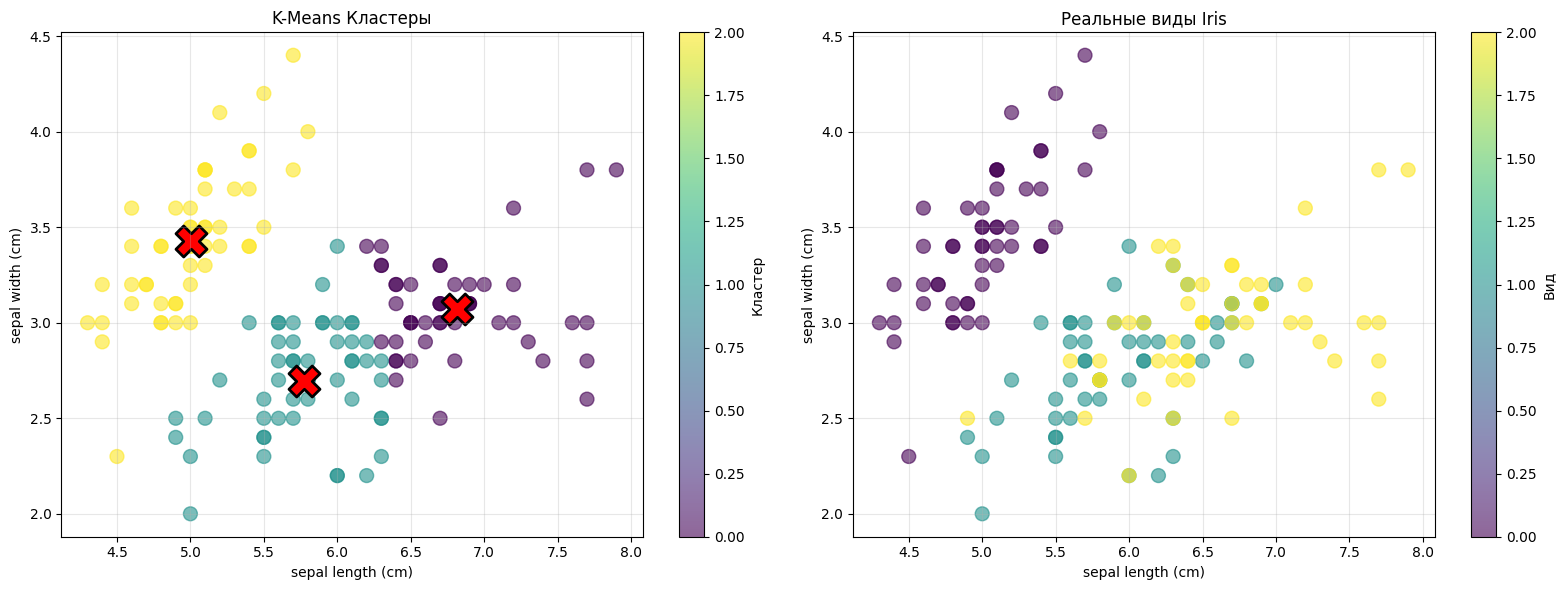

In [6]:
# Сравнение кластеров с реальными метками
df_iris['True_Species'] = iris.target

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Наши кластеры
scatter1 = axes[0].scatter(df_iris.iloc[:, 0], df_iris.iloc[:, 1], 
                          c=clusters_iris, cmap='viridis', s=100, alpha=0.6)
axes[0].scatter(centroids[:, 0], centroids[:, 1], 
               s=500, c='red', marker='X', 
               edgecolors='black', linewidths=2)
axes[0].set_xlabel(feature_names[0])
axes[0].set_ylabel(feature_names[1])
axes[0].set_title('K-Means Кластеры')
axes[0].grid(True, alpha=0.3)
plt.colorbar(scatter1, ax=axes[0], label='Кластер')

# Реальные виды
scatter2 = axes[1].scatter(df_iris.iloc[:, 0], df_iris.iloc[:, 1], 
                          c=iris.target, cmap='viridis', s=100, alpha=0.6)
axes[1].set_xlabel(feature_names[0])
axes[1].set_ylabel(feature_names[1])
axes[1].set_title('Реальные виды Iris')
axes[1].grid(True, alpha=0.3)
plt.colorbar(scatter2, ax=axes[1], label='Вид')

plt.tight_layout()
plt.show()

## Часть 2: Elbow Method - Как выбрать K?

В реальной жизни мы не знаем правильное количество кластеров. **Elbow Method** помогает выбрать оптимальное K.

**Идея:** Запускаем K-Means для разных K и смотрим на Inertia (WCSS)

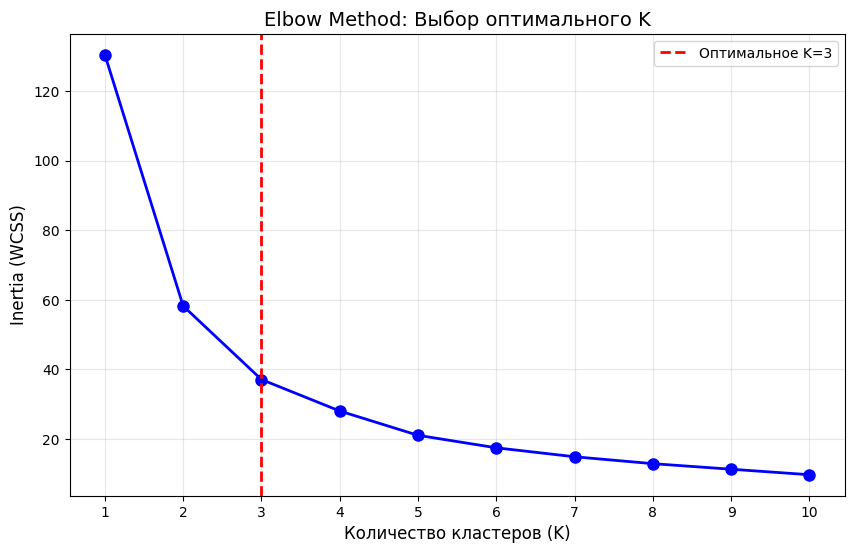

K  | Inertia
--------------------
 1 |   130.48
 2 |    58.20
 3 |    37.05
 4 |    27.99
 5 |    21.00
 6 |    17.41
 7 |    14.83
 8 |    12.84
 9 |    11.24
10 |     9.66


In [7]:
# Elbow Method для Iris dataset
inertias = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_iris)
    inertias.append(kmeans.inertia_)

# Визуализация Elbow Method
plt.figure(figsize=(10, 6))
plt.plot(K_range, inertias, 'bo-', linewidth=2, markersize=8)
plt.xlabel('Количество кластеров (K)', fontsize=12)
plt.ylabel('Inertia (WCSS)', fontsize=12)
plt.title('Elbow Method: Выбор оптимального K', fontsize=14)
plt.grid(True, alpha=0.3)
plt.xticks(K_range)

# Отмечаем "локоть"
plt.axvline(x=3, color='red', linestyle='--', linewidth=2, label='Оптимальное K=3')
plt.legend()
plt.show()

print("K  | Inertia")
print("-" * 20)
for k, inertia in zip(K_range, inertias):
    print(f"{k:2d} | {inertia:8.2f}")

**Интерпретация:**
- При K=1: все точки в одном кластере, Inertia максимальная
- При увеличении K: Inertia уменьшается
- "Локоть" на графике (K=3): дальнейшее увеличение K не дает большого улучшения

**Вывод:** Оптимальное K = 3

---

## Часть 3: Реальная задача - Сегментация стран

**Датасет:** Данные о продолжительности жизни и здоровье по странам мира (WHO)

**Задача:** Разделить страны на группы по их характеристикам здоровья и развития

**Применение:** 
- Определить страны с похожими проблемами здравоохранения
- Помочь международным организациям в распределении ресурсов
- Выявить успешные модели развития

### Загрузка и изучение данных

In [8]:
# Загрузка датасета
df = pd.read_csv('datasets/LifeExpectancyData.csv')

print("Размер датасета:", df.shape)
print("\nПервые строки:")
df.head()

Размер датасета: (2938, 22)

Первые строки:


,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [9]:
# Информация о датасете
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [10]:
# Базовая статистика
df.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


### Выбор признаков для кластеризации

Для упрощения выберем несколько ключевых признаков:
- **Life expectancy**: Продолжительность жизни
- **Adult Mortality**: Смертность взрослых
- **GDP**: ВВП на душу населения
- **Schooling**: Среднее количество лет обучения
- **BMI**: Индекс массы тела

In [11]:
# Выбираем признаки для кластеризации
features = ['Life expectancy ', 'Adult Mortality', 'GDP', 'Schooling', ' BMI ']

# Создаем датасет для кластеризации
df_clustering = df_latest[['Country'] + features].copy()

print("Данные для кластеризации:")
df_clustering.head()

NameError: name 'df_latest' is not defined

In [ ]:
# Проверка пропусков
print("Пропущенные значения:")
print(df_clustering.isnull().sum())
print(f"\nПроцент пропусков в GDP: {df_clustering['GDP'].isnull().sum() / len(df_clustering) * 100:.1f}%")

In [ ]:
# Удаляем строки с пропусками (для упрощения)
df_clustering = df_clustering.dropna()

print(f"Осталось стран после удаления пропусков: {len(df_clustering)}")
df_clustering.head()

### Exploratory Data Analysis (EDA)

Посмотрим на распределения признаков перед кластеризацией.

In [ ]:
# Распределения признаков
fig, axes = plt.subplots(2, 3, figsize=(16, 10))
axes = axes.ravel()

for idx, feature in enumerate(features):
    axes[idx].hist(df_clustering[feature], bins=30, edgecolor='black', alpha=0.7)
    axes[idx].set_title(f'Распределение: {feature}')
    axes[idx].set_xlabel(feature)
    axes[idx].set_ylabel('Частота')
    axes[idx].grid(True, alpha=0.3)

# Удаляем лишний subplot
fig.delaxes(axes[5])
plt.tight_layout()
plt.show()

In [ ]:
# Корреляция между признаками
plt.figure(figsize=(10, 8))
correlation_matrix = df_clustering[features].corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', 
            cmap='coolwarm', center=0, square=True,
            linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Корреляция между признаками', fontsize=14)
plt.tight_layout()
plt.show()

### Feature Scaling

**ВАЖНО:** K-Means использует расстояния, поэтому признаки должны быть в одном масштабе!

Без масштабирования GDP (тысячи) будет доминировать над другими признаками.

In [ ]:
# Сравнение масштабов признаков
print("Масштабы признаков (до scaling):")
print(df_clustering[features].describe().loc[['min', 'max']])

In [ ]:
# Feature Scaling
X = df_clustering[features].values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Создаем DataFrame с масштабированными данными
df_scaled = pd.DataFrame(X_scaled, columns=features, index=df_clustering.index)

print("После масштабирования:")
print(df_scaled.describe().loc[['mean', 'std', 'min', 'max']])

### Elbow Method: Выбор оптимального K

In [ ]:
# Elbow Method
inertias = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

# График Elbow Method
plt.figure(figsize=(10, 6))
plt.plot(K_range, inertias, 'bo-', linewidth=2, markersize=10)
plt.xlabel('Количество кластеров (K)', fontsize=12)
plt.ylabel('Inertia (WCSS)', fontsize=12)
plt.title('Elbow Method: Сегментация стран', fontsize=14)
plt.grid(True, alpha=0.3)
plt.xticks(K_range)
plt.tight_layout()
plt.show()

# Таблица значений
print("\nK  | Inertia  | Уменьшение")
print("-" * 35)
for i, (k, inertia) in enumerate(zip(K_range, inertias)):
    if i > 0:
        decrease = inertias[i-1] - inertia
        print(f"{k:2d} | {inertia:8.2f} | {decrease:8.2f}")
    else:
        print(f"{k:2d} | {inertia:8.2f} | -")

**Вопрос:** Какое K выбрать?

Посмотрите на график и таблицу. Где находится "локоть"?

In [ ]:
# Выберем K=4 (можно изменить на основе Elbow Method)
optimal_k = 4

kmeans_final = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
clusters = kmeans_final.fit_predict(X_scaled)

# Добавляем кластеры в исходный датасет
df_clustering['Cluster'] = clusters

print(f"Распределение стран по кластерам (K={optimal_k}):")
print(df_clustering['Cluster'].value_counts().sort_index())
print(f"\nInertia: {kmeans_final.inertia_:.2f}")

### Профилирование кластеров

Изучим характеристики каждого кластера, чтобы понять какие группы стран мы получили.

In [ ]:
# Средние значения по кластерам
cluster_profiles = df_clustering.groupby('Cluster')[features].mean()

print("Профиль каждого кластера:\n")
print(cluster_profiles.round(2))

In [ ]:
# Визуализация профилей кластеров
fig, axes = plt.subplots(2, 3, figsize=(16, 10))
axes = axes.ravel()

for idx, feature in enumerate(features):
    cluster_profiles[feature].plot(kind='bar', ax=axes[idx], color='steelblue', alpha=0.7)
    axes[idx].set_title(f'{feature} по кластерам', fontsize=11)
    axes[idx].set_xlabel('Кластер')
    axes[idx].set_ylabel(feature)
    axes[idx].grid(True, alpha=0.3, axis='y')
    axes[idx].set_xticklabels(axes[idx].get_xticklabels(), rotation=0)

fig.delaxes(axes[5])
plt.tight_layout()
plt.show()

### Интерпретация кластеров

Давайте посмотрим на примеры стран в каждом кластере.

In [ ]:
# Примеры стран в каждом кластере
for cluster in range(optimal_k):
    countries = df_clustering[df_clustering['Cluster'] == cluster]['Country'].values
    print(f"\n{'='*60}")
    print(f"КЛАСТЕР {cluster} ({len(countries)} стран)")
    print('='*60)
    
    # Профиль кластера
    profile = cluster_profiles.loc[cluster]
    print(f"\nПрофиль:")
    print(f"  - Продолжительность жизни: {profile['Life expectancy ']:.1f} лет")
    print(f"  - Смертность взрослых: {profile['Adult Mortality']:.0f}")
    print(f"  - ВВП: ${profile['GDP']:.0f}")
    print(f"  - Образование: {profile['Schooling']:.1f} лет")
    print(f"  - BMI: {profile[' BMI ']:.1f}")
    
    # Примеры стран
    print(f"\nПримеры стран (первые 15):")
    print(", ".join(countries[:15]))
    if len(countries) > 15:
        print(f"... и еще {len(countries) - 15} стран")

### Визуализация кластеров (2D)

Используем первые два признака для визуализации (Life Expectancy и Adult Mortality)

In [ ]:
# Визуализация кластеров в 2D
plt.figure(figsize=(14, 8))

# Scatter plot
for cluster in range(optimal_k):
    cluster_data = df_clustering[df_clustering['Cluster'] == cluster]
    plt.scatter(cluster_data['Life expectancy '], 
               cluster_data['Adult Mortality'],
               label=f'Кластер {cluster}',
               s=100, alpha=0.6)

# Центроиды (преобразуем обратно к исходному масштабу)
centroids_original = scaler.inverse_transform(kmeans_final.cluster_centers_)
plt.scatter(centroids_original[:, 0],  # Life expectancy
           centroids_original[:, 1],   # Adult Mortality
           s=500, c='red', marker='X', 
           edgecolors='black', linewidths=2,
           label='Центроиды', zorder=5)

plt.xlabel('Продолжительность жизни (годы)', fontsize=12)
plt.ylabel('Смертность взрослых', fontsize=12)
plt.title('Кластеризация стран (K-Means)', fontsize=14)
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [ ]:
# Альтернативная визуализация: GDP vs Schooling
plt.figure(figsize=(14, 8))

for cluster in range(optimal_k):
    cluster_data = df_clustering[df_clustering['Cluster'] == cluster]
    plt.scatter(cluster_data['GDP'], 
               cluster_data['Schooling'],
               label=f'Кластер {cluster}',
               s=100, alpha=0.6)

plt.scatter(centroids_original[:, 2],  # GDP
           centroids_original[:, 3],   # Schooling
           s=500, c='red', marker='X', 
           edgecolors='black', linewidths=2,
           label='Центроиды', zorder=5)

plt.xlabel('ВВП на душу населения ($)', fontsize=12)
plt.ylabel('Среднее количество лет обучения', fontsize=12)
plt.title('Кластеризация стран: ВВП vs Образование', fontsize=14)
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

### Сохранение результатов

In [ ]:
# Экспорт результатов
result_df = df_clustering[['Country', 'Cluster'] + features].sort_values('Cluster')

print("Первые 20 стран с их кластерами:")
result_df.head(20)

In [ ]:
# Можем сохранить результаты в CSV (опционально)
# result_df.to_csv('country_clusters.csv', index=False)

print(f"\n{'='*60}")
print("ИТОГИ КЛАСТЕРИЗАЦИИ")
print('='*60)
print(f"Всего стран проанализировано: {len(df_clustering)}")
print(f"Количество кластеров: {optimal_k}")
print(f"Признаки для кластеризации: {len(features)}")
print(f"Inertia (качество кластеризации): {kmeans_final.inertia_:.2f}")
print("\nРаспределение по кластерам:")
print(df_clustering['Cluster'].value_counts().sort_index())

---

## Выводы

**Что мы сделали:**
1. ✅ Изучили K-Means на простом примере (Iris)
2. ✅ Научились использовать Elbow Method для выбора K
3. ✅ Применили Feature Scaling (критически важно!)
4. ✅ Провели кластеризацию стран по показателям здоровья
5. ✅ Интерпретировали результаты и профилировали кластеры

**Ключевые выводы:**
- Unsupervised Learning находит закономерности без меток
- K-Means - простой и эффективный алгоритм кластеризации
- Feature Scaling обязателен для K-Means
- Elbow Method помогает выбрать оптимальное K
- Результаты нужно интерпретировать в контексте задачи

**Применение:**
- Сегментация клиентов в маркетинге
- Группировка документов
- Анализ социальных сетей
- Рекомендательные системы
- И многое другое!

---

## Домашнее задание

**Задача:** Провести кластеризацию на одном из датасетов:

1. **Датасет Titanic** (`datasets/Titanic_Dataset.csv`)
   - Признаки: Age, Fare, Pclass, SibSp, Parch
   - Цель: найти группы пассажиров с похожими характеристиками
   
2. **Датасет Cars** (`datasets/car_data.csv`)
   - Цель: сегментировать автомобили по их характеристикам

**Требования:**
1. Провести EDA (изучение данных)
2. Выбрать признаки для кластеризации
3. Применить Feature Scaling
4. Использовать Elbow Method для выбора K
5. Обучить K-Means
6. Визуализировать результаты
7. Проинтерпретировать кластеры (дать им названия)

**Удачи! 🚀**

### Выбор признаков для кластеризации

Для упрощения выберем несколько ключевых признаков:
- **Life expectancy**: Продолжительность жизни
- **Adult Mortality**: Смертность взрослых
- **GDP**: ВВП на душу населения
- **Schooling**: Среднее количество лет обучения
- **BMI**: Индекс массы тела